In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd 
import numpy as np 
import re 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')


In [2]:
consumer_key = "29Xs5nzsaNbNPLaSZtmTY7ICP"
consumer_secret = "AKM1aUygwlhHBdM5VEptpyAdDiJK0CSA828IVv2AR4LoivvLeD"
access_token = "784030272-ZanfSy1YKo4QYUmpNrkhHQNcDGkuA1A4Bzc9qLT8"
access_secret = "lUa4XK2ftxxXGqs7MQQ9p36mfwxqd4x8OJqfRuQ4Y41u7"

In [3]:
  # create the authaentication object
  auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  # set the access token key and access secret
  auth.set_access_token(access_token, access_secret)

In [4]:
#create the API object while in the auth information
api=tweepy.API(auth,wait_on_rate_limit=True)



In [5]:
#Extract 100 tweets from twitter user
posts=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extented")

# print last five tweets from the account
print("show the 5 recent tweets: \n")
seq=1
for tweet in posts[0:5]:
    print(str(seq)+") "+tweet.text + '\n')
    seq+=1


show the 5 recent tweets: 

1) RT @WHO: The @ACTAccelerator, an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight #…

2) I was honored to speak at today’s #LeadersClimateSummit about the three things we need to do to avoid a climate dis… https://t.co/z34heWM1Sm

3) Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the so… https://t.co/2zDmn2DC5m

4) It’s encouraging to see @POTUS Biden and @ClimateEnvoy Kerry re-establish America’s leading role on climate change.… https://t.co/Vz6NJrIjoB

5) Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the inju… https://t.co/bR7bI9LePW



In [6]:
#create dataframe with a column called tweet 
df = pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])
df

,Tweets
0,"RT @WHO: The @ACTAccelerator, an unprecedented..."
1,I was honored to speak at today’s #LeadersClim...
2,Ambitious short-term goals like this are criti...
3,It’s encouraging to see @POTUS Biden and @Clim...
4,Yesterday's verdict was a step in the right di...
...,...
95,This book has nothing to do with viruses or pa...
96,Monoclonal antibodies are one of the most prom...
97,RT @AlzData: We’re looking for new ways to adv...
98,"Like many people, I’ve tried to deepen my unde..."


In [7]:
# clean the text
# create a function to clean the tweets
def cleantxt(text):
    # replace word fillowing by @
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    # replace hastag by space
    text = re.sub(r'#','',text)
    # replace RT by space 
    text = re.sub(r'RT[\s]+','',text)
    # remove hyperlink
    text = re.sub(r'https?:\/\/\S+','',text)
    return text


In [8]:
#cleaning the text
df['Tweets']=df['Tweets'].apply(cleantxt)
pd.set_option('display.max_colwidth', None)


In [9]:
# show the clean text
df

,Tweets
0,": The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …"
1,I was honored to speak at today’s LeadersClimateSummit about the three things we need to do to avoid a climate dis…
2,Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the so…
3,It’s encouraging to see Biden and Kerry re-establish America’s leading role on climate change.…
4,Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the inju…
...,...
95,This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times. p…
96,"Monoclonal antibodies are one of the most promising treatments we have for COVID-19, thanks in large part to R&amp;D by…"
97,": We’re looking for new ways to advance AlzheimersResearch. If you have an idea for tools, models, or algorithms that will expa…"
98,"Like many people, I’ve tried to deepen my understanding of systemic racism in recent months. If you’re interested i…"


In [10]:
# create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity 
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
#create two new column
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)


In [11]:
df 

,Tweets,Subjectivity,Polarity
0,": The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …",0.450000,0.300000
1,I was honored to speak at today’s LeadersClimateSummit about the three things we need to do to avoid a climate dis…,0.000000,0.000000
2,Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the so…,0.558333,0.083333
3,It’s encouraging to see Biden and Kerry re-establish America’s leading role on climate change.…,0.000000,0.000000
4,Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the inju…,0.535714,0.285714
...,...,...,...
95,This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times. p…,0.900000,0.400000
96,"Monoclonal antibodies are one of the most promising treatments we have for COVID-19, thanks in large part to R&amp;D by…",0.407143,0.278571
97,": We’re looking for new ways to advance AlzheimersResearch. If you have an idea for tools, models, or algorithms that will expa…",0.454545,0.136364
98,"Like many people, I’ve tried to deepen my understanding of systemic racism in recent months. If you’re interested i…",0.416667,0.250000


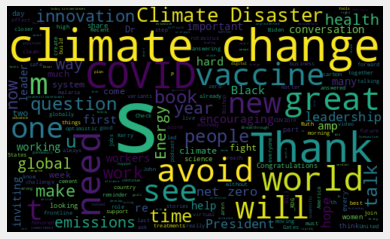

In [12]:
#plot the word cloud
allwords = ' '.join( [twts for twts in df['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
# create a function to compute the negative,neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
df["Analysis"]=df["Polarity"].apply(getAnalysis)

# show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,": The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …",0.450000,0.300000,Positive
1,I was honored to speak at today’s LeadersClimateSummit about the three things we need to do to avoid a climate dis…,0.000000,0.000000,Neutral
2,Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the so…,0.558333,0.083333,Positive
3,It’s encouraging to see Biden and Kerry re-establish America’s leading role on climate change.…,0.000000,0.000000,Neutral
4,Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the inju…,0.535714,0.285714,Positive
...,...,...,...,...
95,This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times. p…,0.900000,0.400000,Positive
96,"Monoclonal antibodies are one of the most promising treatments we have for COVID-19, thanks in large part to R&amp;D by…",0.407143,0.278571,Positive
97,": We’re looking for new ways to advance AlzheimersResearch. If you have an idea for tools, models, or algorithms that will expa…",0.454545,0.136364,Positive
98,"Like many people, I’ve tried to deepen my understanding of systemic racism in recent months. If you’re interested i…",0.416667,0.250000,Positive


In [14]:
#print all the positive tweets
index=1
sortedDF=df.sort_values(by=['Polarity'])
for sorted_value in range(0,sortedDF.shape[0]): 
    if(sortedDF['Analysis'][sorted_value]=='Positive'):
        print(str(index)+') '+sortedDF['Tweets'][sorted_value]+'\n')
        index+=1

1) : The , an unprecedented global alliance to develop &amp; deliver the tests, treatments &amp; vaccines the 🌐 needs to fight …

2) Ambitious short-term goals like this are critical to moving closer to a net-zero future. As we rapidly scale the so… 

3) Yesterday's verdict was a step in the right direction. But one court ruling alone will not bring to an end the inju… 

4) “Time” is a poetic portrait of a family who love and support each other despite their difficult circumstances. I ca… 

5) If “Time” wins the Oscar this year, it will be the first documentary directed by a Black woman to do so. Garrett Br… 

6) : In February, Ghana became the first African country to receive vaccines through COVAX. Meet one of the nurses spearheading the v…

7) The amount of cement China has consumed is a staggering statistic and reminder of how much emissions have grown in… 

8) Cement is responsible for 6% of carbon emissions globally. To get to net-zero by 2050, we need innovations to decar… 

9) 

In [15]:
#print all the negative tweets
index=1
sortedDF=df.sort_values(by=['Polarity'],ascending=False)
for sorted_value in range(0,sortedDF.shape[0]): 
    if(sortedDF['Analysis'][sorted_value]=='Negative'):
        print(str(index)+') '+sortedDF['Tweets'][sorted_value]+'\n')
        index+=1

1) Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail… 

2) Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody.… 

3) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effect… 

4) : Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5) : Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…

6) Moving to a green economy is the biggest challenge the world has ever faced. I’m optimistic we can do it, but need… 

7) Recent extreme weather events are a stark reminder that we’re already seeing the effects of climate change here at… 

8) : The Weekly Planet: Lately, Bill Gates has been thinking about what he calls the “hard stuff” of climate change. These hard…

9) : "Peop

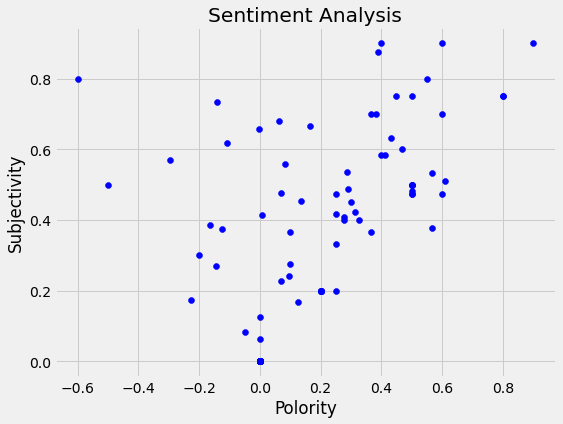

In [16]:
# plot the polority and subjectivity
plt.figure(figsize=(8,6))
for sorted_value in range(0,sortedDF.shape[0]):
    plt.scatter(df["Polarity"][sorted_value],df["Subjectivity"][sorted_value],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polority')
plt.ylabel('Subjectivity')
plt.show()



In [17]:
#Get the percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0] / df.shape[0])*100,1)

58.0

In [18]:
#Get the Negative of positive tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
round((ntweets.shape[0] / df.shape[0])*100,1)

12.0